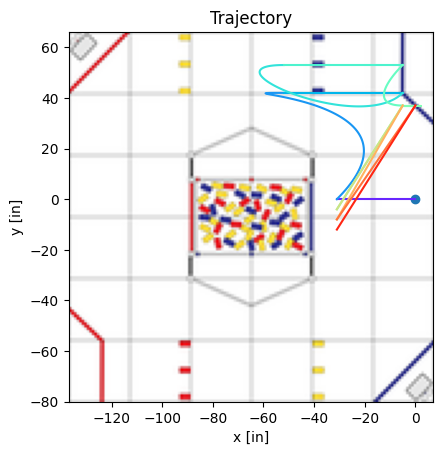

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
def spline_fit(x0, dx0, x1, dx1):
    a = 2 * x0 + dx0 - 2 * x1 + dx1
    b = -3 * x0 - 2 * dx0 + 3 * x1 - dx1
    c = dx0
    d = x0
    return a, b, c, d
def spline_get(spline, u):
    a, b, c, d = spline
    return a * u**3 + b * u**2 + c * u + d
def spline_deriv(spline, u):
    a, b, c, d = spline
    return 3 * a * u**2 + 2 * b * u + c
image=Image.open("into-the-deep.png")
image=image.resize((144, 144), Image.Resampling.LANCZOS)
# plt.imshow(np.rot90(np.array(image),2),extent=[-137,7,-80,66])
plt.imshow(np.rot90(np.array(image),2),extent=[-137,7,-80,66])
# plt.imshow(np.rot90(np.array(image),3),extent=[-72,72,-72,72])
plt.scatter(0,0)
u = np.linspace(0, 1, 100)
trajectory = [
    [0, 0, 0, 0, 0],
    [2, -31, 0, 0, 0],
    [4.5, -31, 0, 0, 0],
    [4.5, -31, 0, 125, 125],
    [6.5, -52, 42, 100, 0],
    [8, -5, 42, 0, 0],
    [8, -5, 42, -50, -50],
    [9.5, -52, 53, 100, 0],
    [11, -5, 53, 0, 0],

    [12, -5, 37, 50, 0],
    [13, -5, 37, 0, 0],

    [14.5, -31, -4, 0, 0],
    [17, -31, -4, 0, 0],

    [18.5, -5, 37, 0, 0],
    [19.5, -5, 37, 0, 0],

    [21, -31, -8, 0, 0],
    [23.5, -31, -8, 0, 0],

    [25, 0, 37, 0, 0],
    [26, 0, 37, 0, 0],

    [27.5, -31, -12, 0, 0],
    [29, -31, -12, 0, 0]
]
# 创建一个颜色映射
colors = plt.cm.rainbow(np.linspace(0, 1, len(trajectory)))
for i in range(1, len(trajectory)):
    if trajectory[i][0]==trajectory[i-1][0]:
        continue
    x_spline = spline_fit(trajectory[i - 1][1]-trajectory[0][1],trajectory[i - 1][3],trajectory[i][1]-trajectory[0][1],trajectory[i][3])
    y_spline = spline_fit(trajectory[i - 1][2]-trajectory[0][2],trajectory[i - 1][4],trajectory[i][2]-trajectory[0][2],trajectory[i][4])
    plt.plot(spline_get(x_spline, u), spline_get(y_spline, u),color=colors[i])
plt.title('Trajectory')
plt.xlabel('x [in]')
plt.ylabel('y [in]')
plt.show()